In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
eeg_df = pd.read_csv("eeg_features_combined.csv")
social_media_df = pd.read_csv("cleaned_social_media_usage.csv")

In [ ]:
# eeg_agg = eeg_df.groupby("User_ID").agg({
#     "Delta": "mean",
#     "Theta": "mean",
#     "Alpha": "mean",
#     "Beta": "mean"
# }).reset_index()

In [8]:
merged_df = pd.merge(eeg_df[['User_ID', 'Delta', 'Theta', 'Alpha', 'Beta']], 
                     social_media_df[['User_ID', 'Engagement_Score', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']], 
                     on='User_ID', 
                     how='inner')

In [9]:
correlation_matrix = merged_df[['Delta', 'Theta', 'Alpha', 'Beta', 'Engagement_Score', 'Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']].corr()
print(correlation_matrix)


                        Delta     Theta     Alpha      Beta  Engagement_Score  \
Delta                1.000000  0.246977  0.184163  0.155170          0.018258   
Theta                0.246977  1.000000  0.980326  0.955508          0.130294   
Alpha                0.184163  0.980326  1.000000  0.994837          0.140742   
Beta                 0.155170  0.955508  0.994837  1.000000          0.144071   
Engagement_Score     0.018258  0.130294  0.140742  0.144071          1.000000   
Daily_Minutes_Spent -0.091989 -0.775075 -0.837069 -0.856828          0.185768   
Posts_Per_Day        0.090786  0.745314  0.804948  0.823954         -0.406732   
Likes_Per_Day        0.046515  0.382017  0.412584  0.422326          0.878371   
Follows_Per_Day     -0.014888 -0.149268 -0.161181 -0.164979          0.931537   

                     Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
Delta                          -0.091989       0.090786       0.046515   
Theta                          -0.775075 

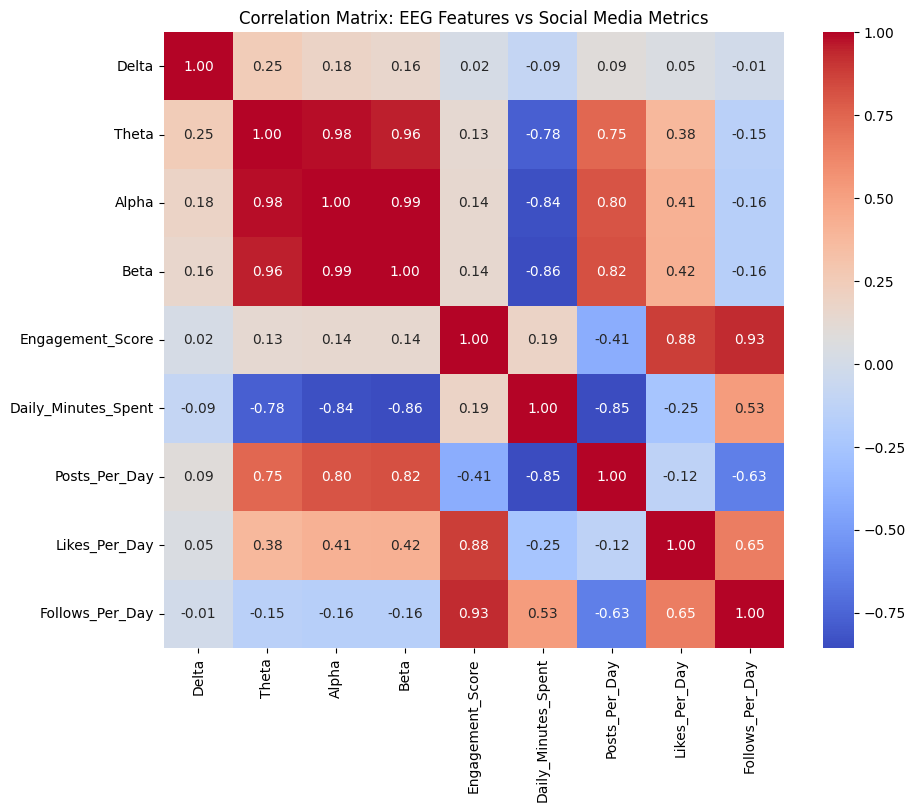

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix: EEG Features vs Social Media Metrics")
plt.show()

In [11]:
from sklearn.cluster import KMeans
import numpy as np

# Select features to be used for clustering
agg_social_media = social_media_df.groupby('User_ID').agg({
    'Daily_Minutes_Spent': 'sum',    # Total time spent on social media
    'Posts_Per_Day': 'mean',         # Average posts per day
    'Likes_Per_Day': 'mean',         # Average likes per day
    'Follows_Per_Day': 'mean',       # Average follows per day
    'Engagement_Score': 'mean'       # Average engagement score
}).reset_index()
social_media_features = agg_social_media[['Daily_Minutes_Spent', 'Posts_Per_Day', 'Likes_Per_Day', 'Follows_Per_Day']]

# Normalize the features (important for clustering)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
social_media_features_scaled = scaler.fit_transform(social_media_features)

# Perform K-means clustering (you can experiment with the number of clusters)
kmeans = KMeans(n_clusters=5, random_state=42)  # Let's start with 5 clusters
agg_social_media['Cluster'] = kmeans.fit_predict(social_media_features_scaled)

# Check the results
print(agg_social_media.head())


  User_ID  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day  \
0     U_1                  288           16.0           94.0              0.0   
1    U_10                  428            6.0            4.0             41.0   
2   U_100                  479           16.0           61.0              6.0   
3  U_1000                  115           17.0           81.0             39.0   
4   U_101                   82           13.0          137.0              8.0   

   Engagement_Score  Cluster  
0             110.0        4  
1              51.0        3  
2              83.0        3  
3             137.0        0  
4             158.0        4  


In [12]:
agg_eeg = eeg_df.groupby('User_ID').agg({
    'Delta': 'mean',
    'Theta': 'mean',
    'Alpha': 'mean',
    'Beta': 'mean'
}).reset_index()

# Check the aggregated EEG data
print(agg_eeg.head())

merged_data = pd.merge(agg_social_media, agg_eeg, on='User_ID')

# Now you have a dataframe with both EEG features and social media engagement data
print(merged_data.head())

# Calculate the correlation between EEG features and engagement score
correlation_matrix = merged_data[['Delta', 'Theta', 'Alpha', 'Beta', 'Engagement_Score']].corr()

# Display the correlation matrix
print(correlation_matrix)


  User_ID         Delta         Theta         Alpha          Beta
0     U_1  1.938003e+14  2.381237e+10  7.909333e+09  3.526976e+09
1     U_2  1.630633e+15  1.696238e+11  5.633768e+10  2.512207e+10
2     U_3  3.270668e+15  2.146973e+11  7.133624e+10  3.181336e+10
3     U_4  1.555351e+16  1.113530e+12  3.699439e+11  1.649766e+11
  User_ID  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  Follows_Per_Day  \
0     U_1                  288           16.0           94.0              0.0   
1     U_2                  192           14.0          117.0             15.0   
2     U_3                  351           13.0          120.0             48.0   
3     U_4                   21           20.0          117.0              8.0   

   Engagement_Score  Cluster         Delta         Theta         Alpha  \
0             110.0        4  1.938003e+14  2.381237e+10  7.909333e+09   
1             146.0        4  1.630633e+15  1.696238e+11  5.633768e+10   
2             181.0        2  3.270668e+15

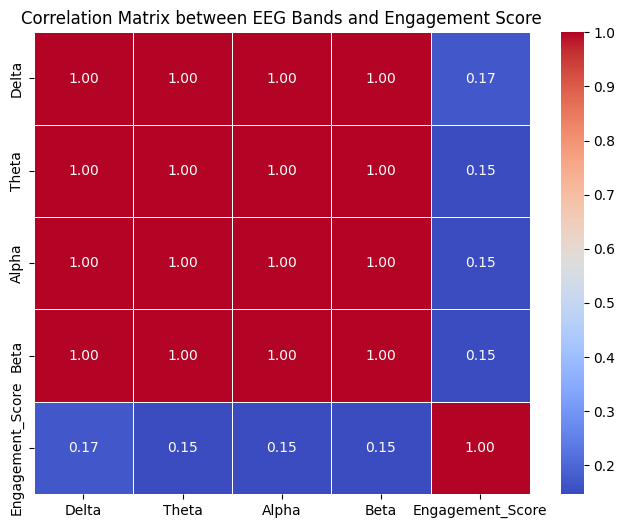

In [13]:
# You can plot the correlation matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix between EEG Bands and Engagement Score")
plt.show()
